Regression equation:   y = -3.957 + 11.149*x1 + 0.877*x2 + -3.833*x3 
MSE = 4.469

Regression equation:   y = 0.415 + 0.304*x1 + 0.367*x2 + -0.187*x3 + -0.33*x4 + -0.27*x5 + -0.153*x6 + 0.176*x7 + 0.06*x8 + -0.024*x9 
MSE = 0.073



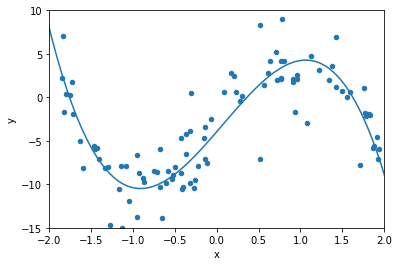

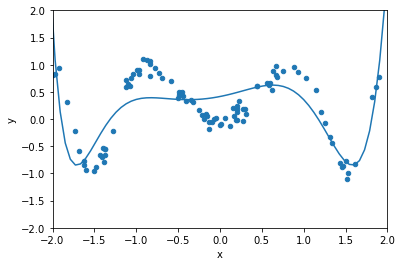

In [2]:
"""
Written by Zachary Pulliam

visualize.ipynb fits regression models on two 2D SyntheticDataset's and plots the regression equation
"""

import os
import numpy as np
from matplotlib import pyplot as plt

from regression import Regression
from datasets import SyntheticDataset


"""Variables for the user to change"""
ROOT = ''  # path to data folder


"""Returns a polynomial for x values for the coeffs provided"""
def poly_coeffs(x, coeffs):

    power = len(coeffs)
    y = 0
    for i in range(power):
        y += coeffs[i]*x**i
    return y

# datasets
sd1 = SyntheticDataset(os.path.join(ROOT, 'synthetic-1.csv'), transform=None, poly=3)
sd2 = SyntheticDataset(os.path.join(ROOT, 'synthetic-2.csv'), transform=None, poly=9)

# regression for the SyntheticDataset #1
reg1 = Regression(sd1.x, sd1.y, alpha=0.01, lam=None, epochs=100000)
coeffs1 = reg1.theta.flatten().tolist()
reg1.mse(sd1.x, sd1.y)

# regression for the SyntheticDataset #2
reg2 = Regression(sd2.x, sd2.y, alpha=0.0001, lam=None, epochs=100000)
coeffs2 = reg2.theta.flatten().tolist()
reg2.mse(sd2.x, sd2.y)


# plotting SyntheticDataset #1 and regression equation
sd1.scaled_df.plot(x='x',y='y',kind='scatter')
x = np.linspace(-3, 3, 100)
plt.xlim(-2, 2)
plt.ylim(-15, 10)
plt.plot(x, poly_coeffs(x, coeffs1))

# plotting SyntheticDataset #2 and regression equation
sd2.scaled_df.plot(x='x',y='y',kind='scatter')
x = np.linspace(-3, 3, 100)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.plot(x, poly_coeffs(x, coeffs2))
